<a href="https://colab.research.google.com/github/EugeneSantaclausian/Datasets/blob/master/Sidu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

---


### This is SIDU's demo model. SIDU seeks to brigde the disconnnect between the Job Markets and the Skillsets of Employees. Using Machine Learning algorithms, SIDU predicts suitable courses and career options for students to meet the demands of the Job market using their examination scores.

---





**WE BEGIN BY IMPORTING SOME LIBRARIES WE WILL NEED TO WORK WITH OUR DATASET AND DRAW OUR PREDICTIONS**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

ds = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv')

## **DATA EXPLORATION**

In [0]:
ds.head(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50


In [0]:
ds.shape

(173, 21)

In [0]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [0]:
ds.corr()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,1.000000,0.108429,0.071137,-0.094780,0.174913,0.643781,0.008492,0.070751,0.034725,0.193174,0.020418,0.090078,0.068900,-0.873308,-0.735688,-0.802686,0.052639,0.144689,0.202920
Major_code,0.108429,1.000000,0.196784,0.179299,0.181459,0.259211,0.206580,0.200925,0.199397,0.195184,0.205634,0.223418,0.126603,-0.176072,-0.166864,-0.094556,0.041198,0.232425,0.225294
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.643781,0.259211,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523,0.121243,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850
Sample_size,0.008492,0.206580,0.945575,0.875176,0.862606,0.097496,1.000000,0.964462,0.978396,0.824824,0.985235,0.918059,0.059872,-0.067578,-0.025229,-0.055737,0.701704,0.915464,0.860319
Employed,0.070751,0.200925,0.996214,0.870605,0.944037,0.147547,0.964462,1.000000,0.995838,0.934528,0.991047,0.968900,0.068056,-0.107547,-0.067514,-0.087560,0.797534,0.941326,0.927224
Full_time,0.034725,0.199397,0.989339,0.893563,0.917681,0.120200,0.978396,0.995838,1.000000,0.900877,0.998203,0.960102,0.063349,-0.082258,-0.042957,-0.065073,0.772515,0.933124,0.904852
Part_time,0.193174,0.195184,0.950268,0.751592,0.954513,0.212290,0.824824,0.934528,0.900877,1.000000,0.880855,0.945094,0.108944,-0.190124,-0.153509,-0.158220,0.804987,0.909634,0.951593


In [0]:
ds.isna().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

## **DATA WRANGLING**

In [0]:
ds = ds.dropna()

In [0]:
ds = ds.drop(columns = 'Major')

In [0]:
ds.isna().sum()

Rank                    0
Major_code              0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [0]:
ds.nunique()

Rank                    172
Major_code              172
Total                   172
Men                     172
Women                   171
Major_category           16
ShareWomen              172
Sample_size             147
Employed                170
Full_time               172
Part_time               169
Full_time_year_round    172
Unemployed              160
Unemployment_rate       168
Median                   59
P25th                    48
P75th                    54
College_jobs            172
Non_college_jobs        172
Low_wage_jobs           165
dtype: int64

In [0]:
ds['Major_category'].unique()

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Agriculture & Natural Resources', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism',
       'Interdisciplinary'], dtype=object)

In [0]:
Major = {'Engineering':0,'Business':1,'Physical Sciences':2,'Law & Public Policy':3,'Computers & Mathematics':4,
        'Industrial Arts & Consumer Services':5,'Arts':6,'Health':7,'Social Science':8,'Biology & Life Science':9,
        'Education':10,'Agriculture & Natural Resources':11,'Humanities & Liberal Arts':12,'Psychology & Social Work':13,'Communications & Journalism':14,
        'Interdisciplinary':15}
ds['Major_category'] = [Major[item] for item in ds['Major_category']]

In [0]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 20 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null int64
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs           172 non-null int64
dtypes: float64(5), int64

## **VISUALIZATION**

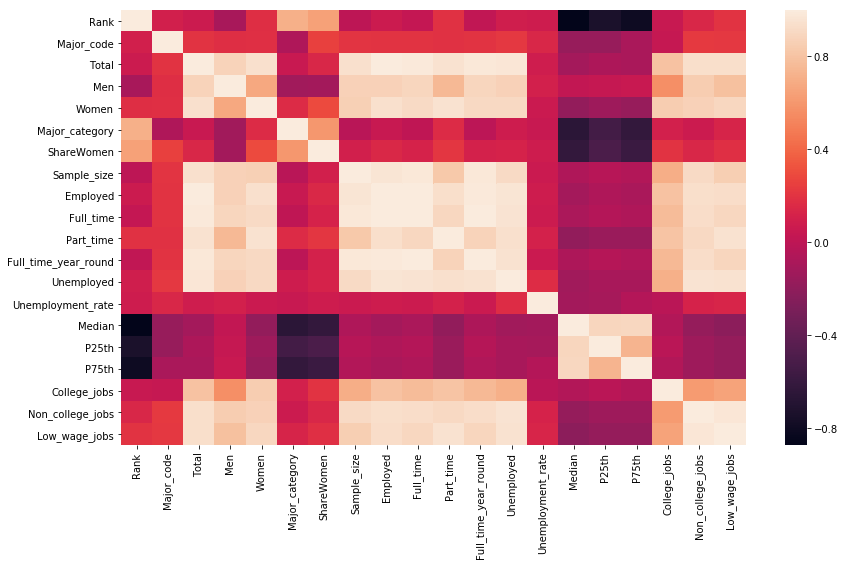

In [0]:
plt.figure(figsize=(14,8))
sns.heatmap(ds.corr())

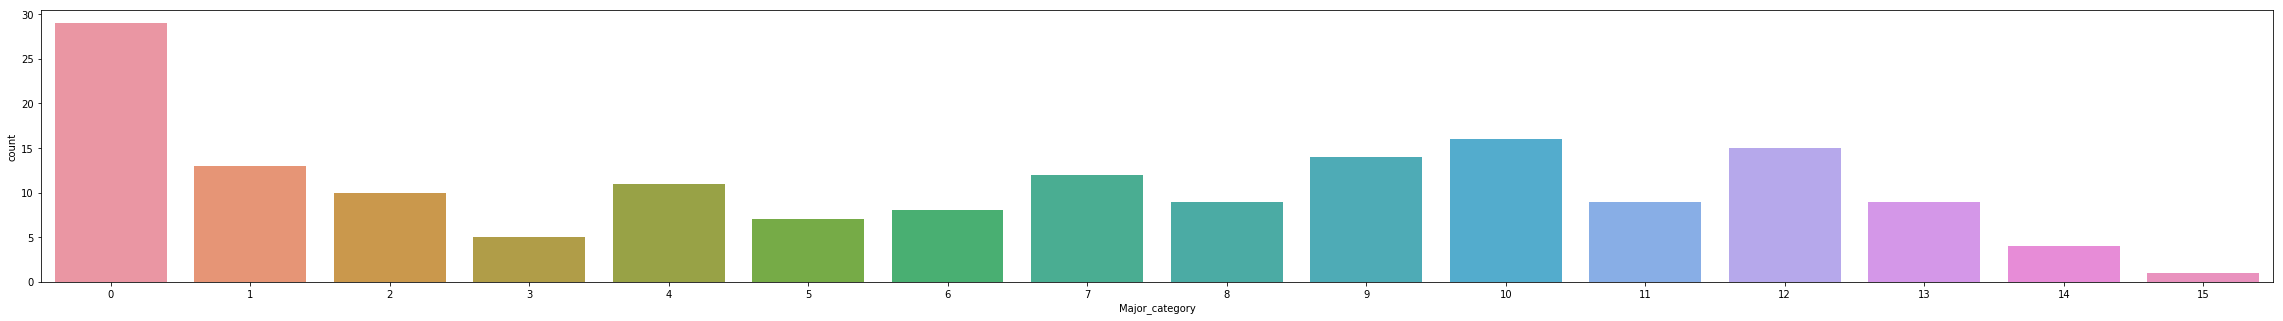

In [0]:
from pylab import rcParams

rcParams['figure.figsize'] = 40,5

sns.countplot(x='Major_category', data=ds)

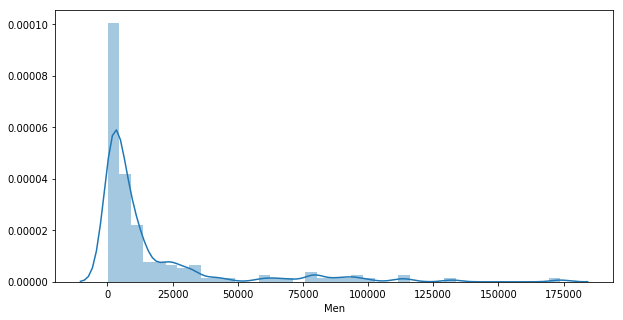

In [0]:
from pylab import rcParams

rcParams['figure.figsize'] = 10,5

sns.distplot(ds['Men'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f4b45b2ff98>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4b45b387f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4b45b40208>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4b45b38e80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4b45b38128>,
  <matplotlib.lines.Line2D at 0x7f4b45b384a8>]}

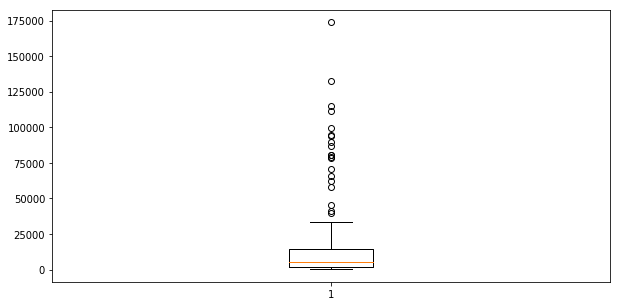

In [0]:
plt.boxplot(ds['Men'])

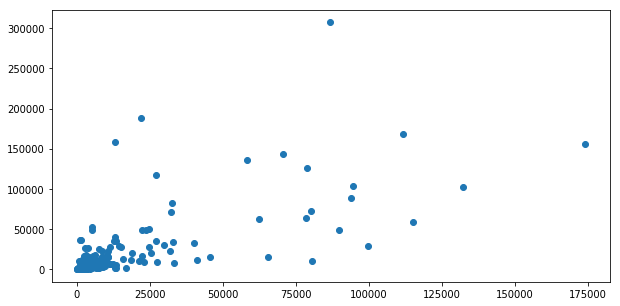

In [0]:
plt.scatter(ds['Men'],ds['Women'])

### **A Scatterplot of the Relationship between Men & Women in the dataset**

## **MODELLING**

In [0]:
#We want to train our model to predict possible 'Major_Category(Career Path)' on all coulmns except Rank, P25th & P75th 

X = ds.drop(['Major_category','Rank','Median','P25th','P75th'], axis = 1)
Y = ds['Major_category']

In [0]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, train_size = 0.75, random_state = 65000, shuffle = True)

**LOGISTIC REGRESSION**

In [0]:
logmodel = LogisticRegression()

logmodel.fit(X_train,Y_train)
prediction = logmodel.predict(X_test)
print('Fitting & Predicting Complete!')

Fitting & Predicting Complete!


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
print('Our confusion matrix for Logistic Regression is:\n',confusion_matrix(Y_test,prediction))
print('Our accuracy for Logistic Regression is:\n',accuracy_score(Y_test,prediction)*100,'%')

Our confusion matrix for Logistic Regression is:
 [[3 0 0 1 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 3 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 2 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Our accuracy for Logistic Regression is:
 30.23255813953488 %


**DECISION TREE**

In [0]:
from sklearn.tree import DecisionTreeClassifier

dclass = DecisionTreeClassifier()
dclass.fit(X_train,Y_train)

prediction = dclass.predict(X_test)
print('Fitting & Prediction complete!')

Fitting & Prediction complete!


In [0]:
print('Our confusion matrix for the Decision Tree Algorithm is:\n',confusion_matrix(Y_test,prediction))
print('Our accuracy for the Decision Tree Algorithm is:\n',accuracy_score(Y_test,prediction)*100,'%')

Our confusion matrix for the Decision Tree Algorithm is:
 [[8 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 2 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 1 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3]]
Our accuracy for the Decision Tree Algorithm is:
 76.74418604651163 %


**RANDOM FOREST CLASSIFIER**

In [0]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 3, random_state = 0)

classifier.fit(X_train,Y_train)

prediction = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
print('Our confusion matrix for Random Forest is:\n',confusion_matrix(Y_test,prediction))
print('Our accuracy for Random Forest is:\n',accuracy_score(Y_test,prediction)*100,'%')

Our confusion matrix for Random Forest is:
 [[7 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 3 0 2 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 1 1 0 0 0 0 0 0 3 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 2 0 1 0 1 0 1 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 0 0 0 0 0 0 0]]
Our accuracy for Random Forest is:
 34.883720930232556 %
